In [1]:
# Import all required libraries

%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.datasets import load_digits
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
import warnings
warnings.filterwarnings("ignore")
import scikitplot as skplt
from sklearn.pipeline import make_pipeline

In [24]:
# Import data set
cancer = pd.read_csv("/Users/riyakhurana09/Desktop/Riya Khurana/Classes/Spring 2022/Predictive 6420/HW1/Q5/wdbc_V2.csv")
cancer.info()

# Remove Unnamed column
del cancer['Unnamed: 32']
print(cancer.keys())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Data Exploration

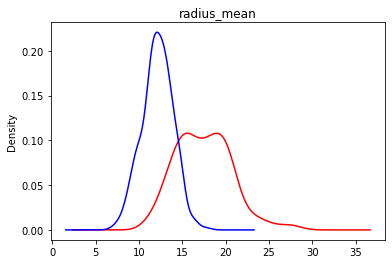

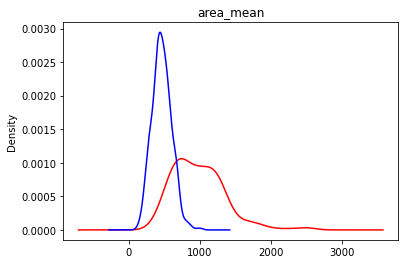

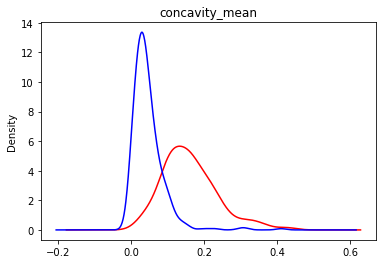

In [3]:
for i in ('radius_mean', 'area_mean', 'concavity_mean'):
    cancer[i][cancer['diagnosis'] == 'M'].plot.kde(title = i, c='r')
    cancer[i][cancer['diagnosis'] == 'B'].plot.kde(title = i, c='b')
    plt.show()

In [4]:
# Correlation Matrix
cancer.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### Defining classes for Binary Classification

In [5]:
# Malignant as 1, Benign as 0
cancer['diagnosis'] = np.where(cancer['diagnosis'] == 'M', 1, 0)

In [6]:
# Defining Independent and Target Variable
X = cancer.drop(['id', 'diagnosis'], axis =1)
y = cancer['diagnosis']

### Train-Test Split

In [7]:
# 0.33 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Establishing Hyperparameters

In [8]:
# Decision Tree
dt_criterion = ['gini','entropy']
dt_splitter = ['best', 'random']
dt_max_depth = range(1,10)
dt_min_samples_leaf = range(1,10)

# KNN
knn_range = list(range(1,31))
knn_weights = ["uniform", "distance"]

# SVM
svm_c_values = [1, 10, 100, 1000]
svm_gamma = [1e-3, 1e-4]
scoring = 'recall'

# Parameter Grid
dt_grid = dict(criterion = dt_criterion , splitter = dt_splitter, max_depth = dt_max_depth, min_samples_leaf = dt_min_samples_leaf)
knn_grid = dict(kneighborsclassifier__n_neighbors = knn_range, kneighborsclassifier__weights = knn_weights)
lr_grid =  [{'penalty': ['l2','l1'], 'solver': ['liblinear','saga', 'newton-cg','lbfgs'],
             'C': [ 10, 1, 0.1, 0.01,0.001]}]
svm_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [9]:
# Classifiers
dt = DecisionTreeClassifier()
knn = make_pipeline(MinMaxScaler(),KNeighborsClassifier())
lr = LogisticRegression(max_iter = 10000)
svm = SVC()

### Grid Search

In [10]:
np.random.seed(11)

i = 1
inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, scoring = scoring, cv = inner_cv)
knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid, scoring = scoring, cv = inner_cv)
lr_clf = GridSearchCV(estimator = lr, param_grid = lr_grid, scoring = scoring, cv = inner_cv)
svm_clf = GridSearchCV(estimator = svm, param_grid = svm_grid, scoring = scoring, cv = inner_cv)

dt_score = cross_val_score(dt_clf, X = X_train, y = y_train, cv = outer_cv)
dt_score_mean = dt_score.mean()
knn_score = cross_val_score(knn_clf, X = X_train, y = y_train, cv = outer_cv)
knn_score_mean = knn_score.mean()
lr_score = cross_val_score(lr_clf, X = X_train, y = y_train, cv = outer_cv)
lr_score_mean = lr_score.mean()
svm_score = cross_val_score(svm_clf, X = X_train, y = y_train, cv = outer_cv)
svm_score_mean = svm_score.mean()

### Model Results

In [20]:
print('Recall','\nDecision Tree:', round(dt_score_mean,4), '\nKNN:', round(knn_score_mean,3), \
      '\nLogistic Regression:', round(lr_score_mean,3), '\nSVM:', round(svm_score_mean,3))

Recall 
Decision Tree: 0.9005 
KNN: 0.908 
Logistic Regression: 0.929 
SVM: 0.922


### Best performing model - Logistic Regression

In [12]:
# Logistic Regression is our best performing model
lr_clf = GridSearchCV(estimator = lr, param_grid = lr_grid, scoring = scoring, cv = inner_cv)
lr_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=10000),
             param_grid=[{'C': [10, 1, 0.1, 0.01, 0.001],
                          'penalty': ['l2', 'l1'],
                          'solver': ['liblinear', 'saga', 'newton-cg',
                                     'lbfgs']}],
             scoring='recall')

In [22]:
print('Best estimator (Hyperparameters):\n',lr_clf.best_estimator_)

Best estimator (Hyperparameters):
 LogisticRegression(C=10, max_iter=10000, solver='newton-cg')


### Classification Report

In [25]:
y_predict_test = lr_clf.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test,y_predict_test))
print('\nAccuracy: ',round(accuracy_score(y_test, y_predict_test),3))
print('F1-score: ',round(f1_score(y_test, y_predict_test),3))
print(classification_report(y_test, y_predict_test))

Confusion Matrix: 
 [[121   5]
 [  4  58]]

Accuracy:  0.952
F1-score:  0.928
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       126
           1       0.92      0.94      0.93        62

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



#### Logistic Regression is the best performing model which gives a recall of 92.9% with an accuracy of 95.2% and F-score of 92.8%.

### ROC and Lift Curve

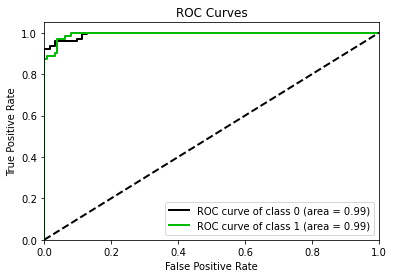

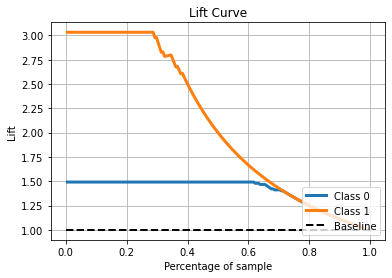

In [15]:
skplt.metrics.plot_roc(y_test, lr_clf.predict_proba(X_test), plot_micro = False, plot_macro = False)
skplt.metrics.plot_lift_curve(y_test, lr_clf.predict_proba(X_test))
plt.show()

#### The ROC curve gives an almost perfect curve. After the True Positive Rate reached 0.9, we started getting a False Positive Rate which is a significant number. For Class 1, which is the Malignant cancer class, the Lift Curve gives a value of >3 which indicates that there is a more than 2 times better chance of the model correctly predicting than a random chance/guess.